implementing linear regression, multiple linear regression, and the log-linear 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.drop('Id', axis=1, inplace=True)

# categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# numerical columns
numerical_cols = data.select_dtypes(include='number').columns

In [5]:
data[numerical_cols].isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

<Axes: >

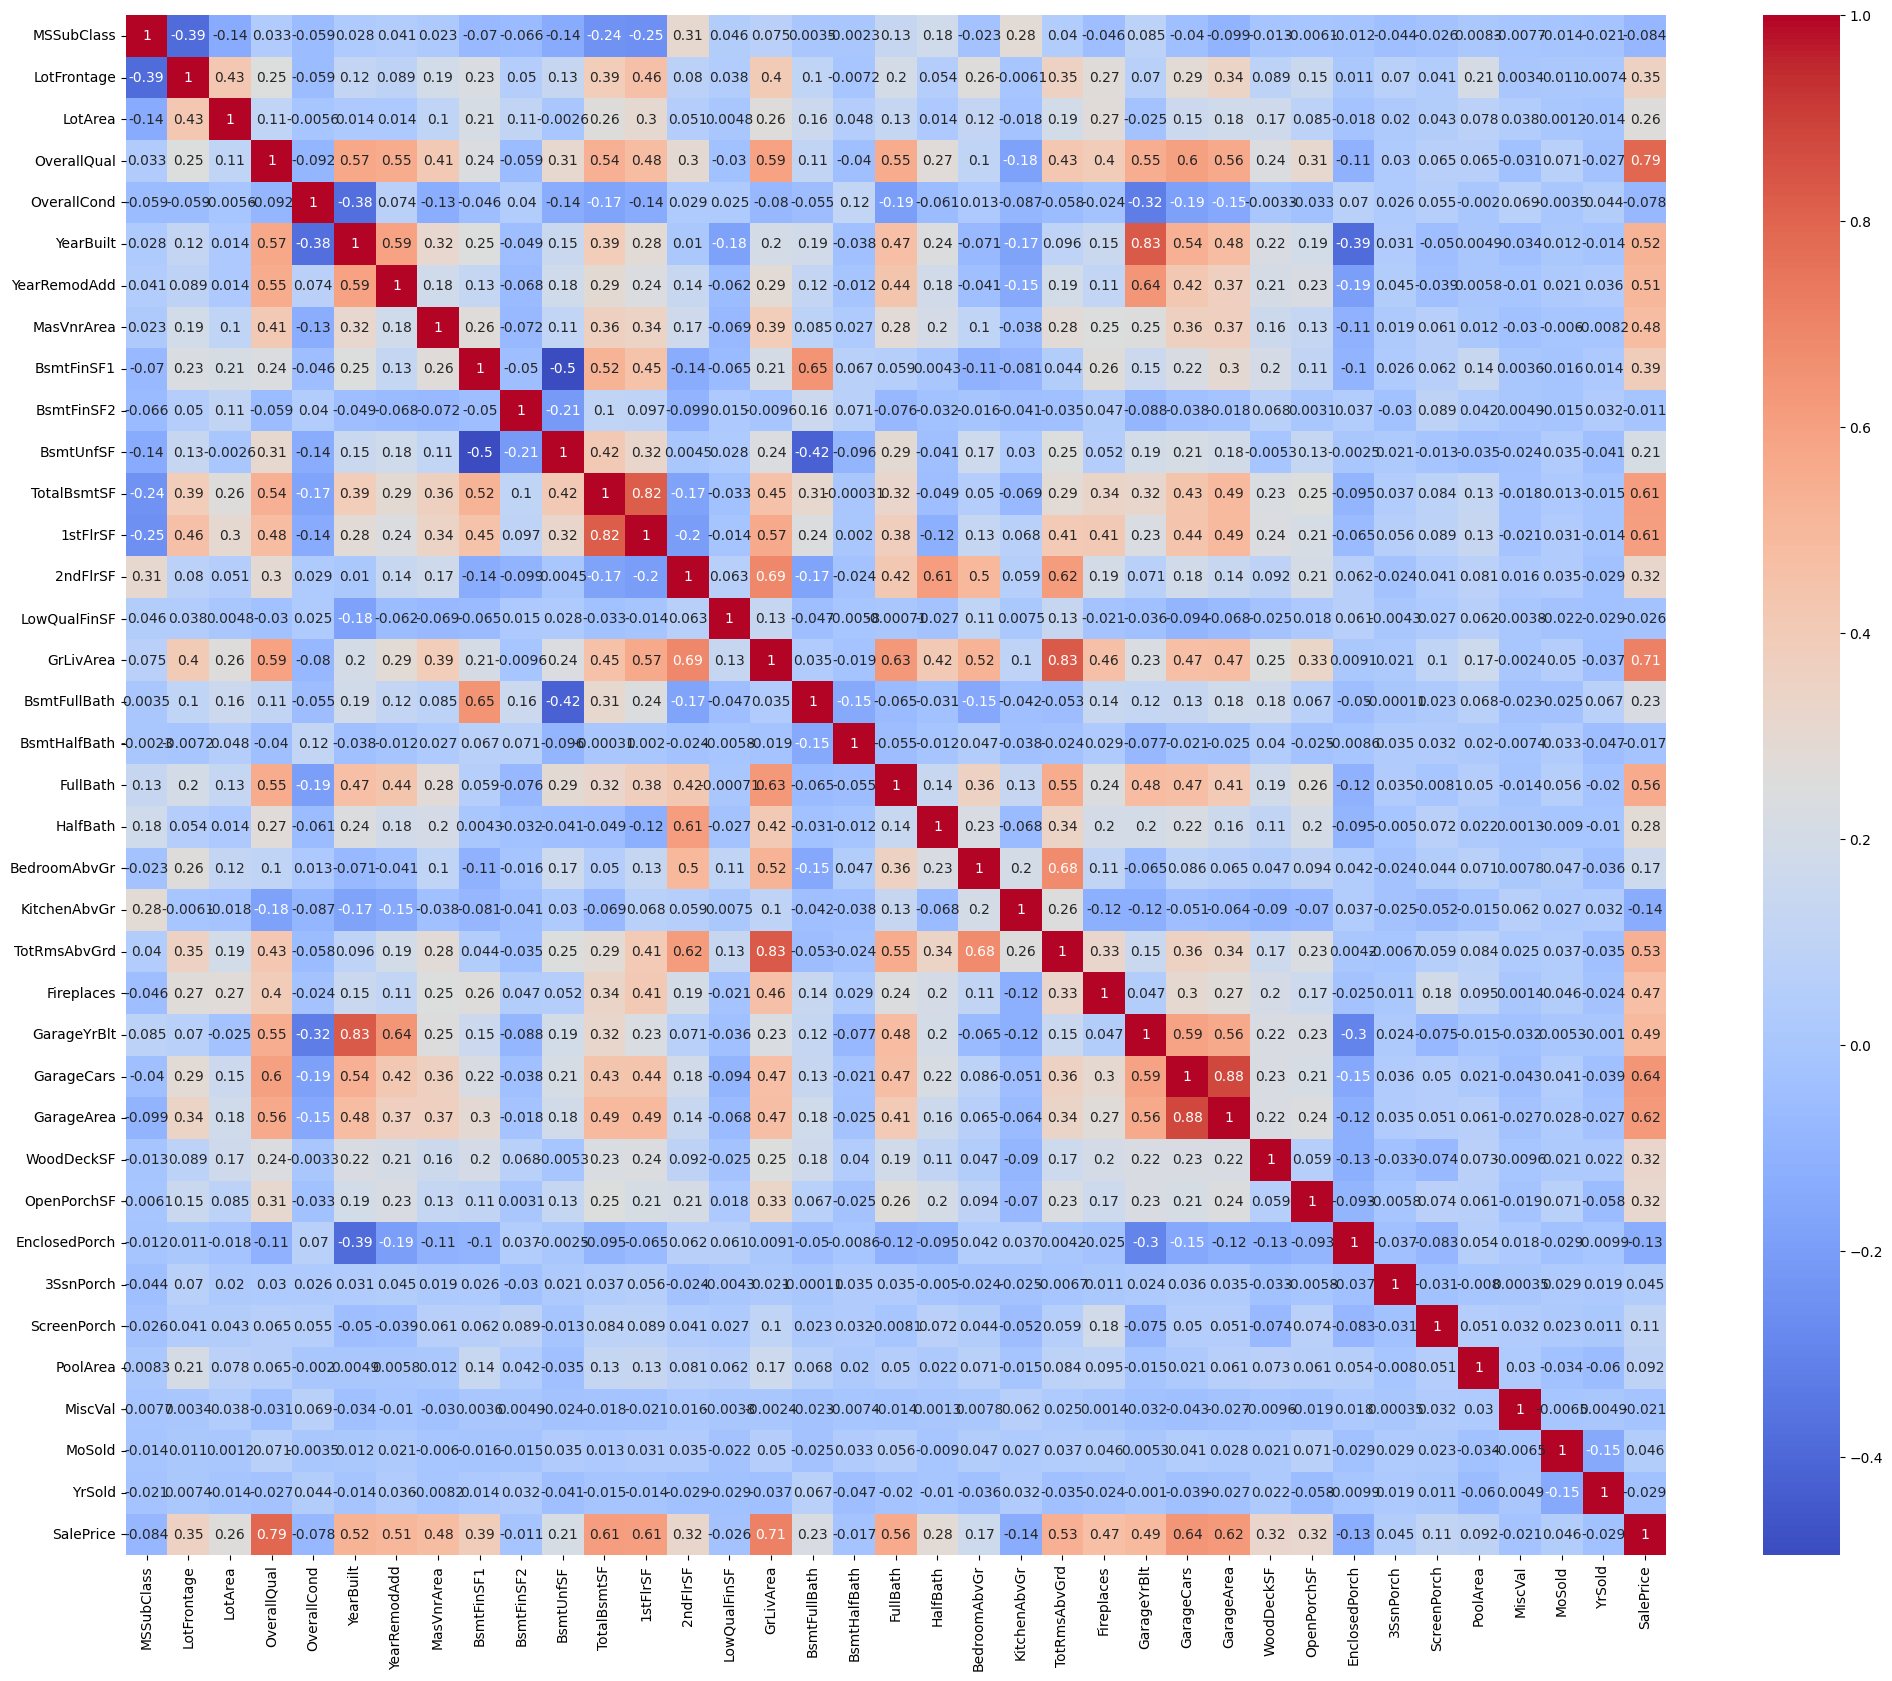

In [10]:
# plot correlation coeff matrix of numerical_cols
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)


In [11]:
# select best columns are 'OverallQual','GrLivArea'

X= data['GrLivArea']
Y = data['SalePrice']

In [12]:
X.shape, Y.shape

((1460,), (1460,))

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X.values.reshape(-1, 1))
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

In [14]:
# train test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), Y_train)

LinearRegression()

In [22]:
print(lr.intercept_)
#print(lm.coef_)
#pd.DataFrame(lm.coef_, x.columns, columns=['Coeff'])

[0.02697512]


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
Y_pred = lr.predict(X_test.reshape(-1, 1))
n = X_test.shape[0] 
p = X_test.shape[1]  

r2 = metrics.r2_score(Y_test, Y_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R²:', r2)
print('Adjusted R²:', adjusted_r2)

MAE: 0.0542787314710687
MSE: 0.00610958360129068
RMSE: 0.07816382540082516
R²: 0.470327129003008
Adjusted R²: 0.4685006708271563


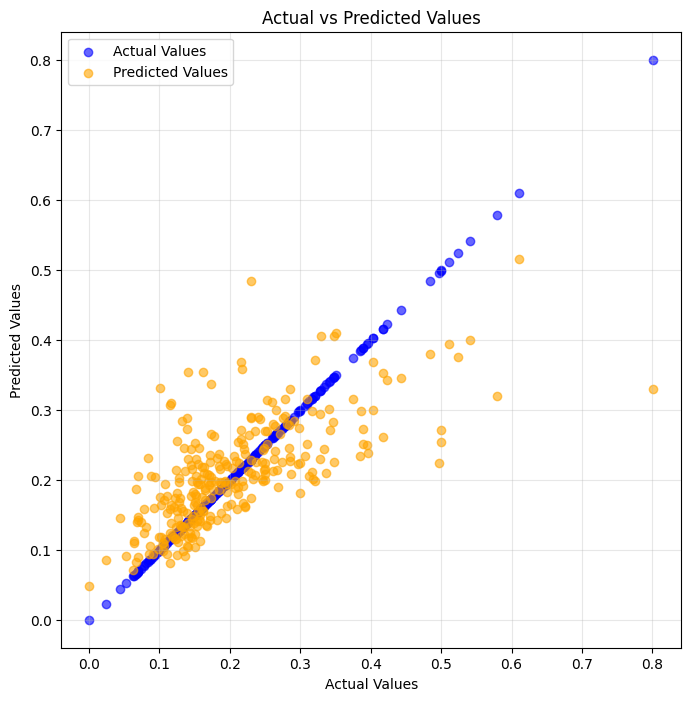

In [24]:

predictions = lr.predict(X_test)
#plt.scatter(y_test, predictions)
#sns.displot((y_test-predictions),bins=50,kde=True)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(Y_test, Y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(Y_test, predictions, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [70]:
X_mul = data[[ 'OverallQual','GrLivArea','LotArea','TotRmsAbvGrd','GarageCars','GarageArea',
              'Fireplaces','PoolArea']]
Y_mul = data['SalePrice']
X_mul.shape, Y_mul.shape

((1460, 8), (1460,))

In [71]:
X_mul = scaler.fit_transform(X_mul) # Remove .values since X_mul is already a numpy array
Y_mul = scaler.fit_transform(Y_mul.values.reshape(-1, 1)) # Keep .values for Y_mul (Series) and reshape

In [72]:
# split
X_mul_train, X_mul_test, Y_mul_train, Y_mul_test = train_test_split(X_mul, Y_mul, test_size=0.2)

X_mul_train.shape, X_mul_test.shape, Y_mul_train.shape, Y_mul_test.shape

((1168, 8), (292, 8), (1168, 1), (292, 1))

In [73]:
lr_mul = LinearRegression()
lr_mul.fit(X_mul, Y_mul)

LinearRegression()

In [74]:
print(lr_mul.intercept_)

[-0.12193496]


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
Y_pred = lr.predict(X_test.reshape(-1, 1))
n = X_test.shape[0] 
p = X_test.shape[1]  

r2 = metrics.r2_score(Y_test, Y_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R²:', r2)
print('Adjusted R²:', adjusted_r2)

MAE: 0.0542787314710687
MSE: 0.00610958360129068
RMSE: 0.07816382540082516
R²: 0.470327129003008
Adjusted R²: 0.4685006708271563


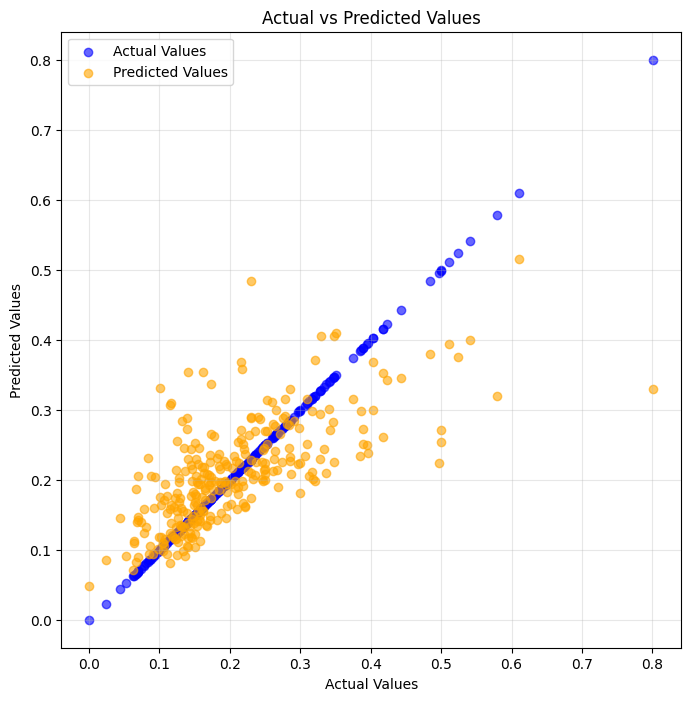

In [76]:

predictions = lr.predict(X_test)
#plt.scatter(y_test, predictions)
#sns.displot((y_test-predictions),bins=50,kde=True)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(Y_test, Y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(Y_test, predictions, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [79]:
X_log = data[[ 'OverallQual','GrLivArea','LotArea','TotRmsAbvGrd','GarageCars','GarageArea',
              'Fireplaces','PoolArea']]
Y_log = np.log(data['SalePrice'])

X_log.shape, Y_log.shape

((1460, 8), (1460,))

In [80]:
X_log = scaler.fit_transform(X_log)
# split data
X_log_train, X_log_test, Y_log_train, Y_log_test = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)

In [81]:
lr_log = LinearRegression()
lr_log.fit(X_log_train, Y_log_train)

LinearRegression()

In [84]:
print(lr_log.intercept_)

10.820714797997084


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
Y_pred = lr.predict(X_test.reshape(-1, 1))
n = X_test.shape[0] 
p = X_test.shape[1]  

r2 = metrics.r2_score(Y_test, Y_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R²:', r2)
print('Adjusted R²:', adjusted_r2)

MAE: 0.0542787314710687
MSE: 0.00610958360129068
RMSE: 0.07816382540082516
R²: 0.470327129003008
Adjusted R²: 0.4685006708271563


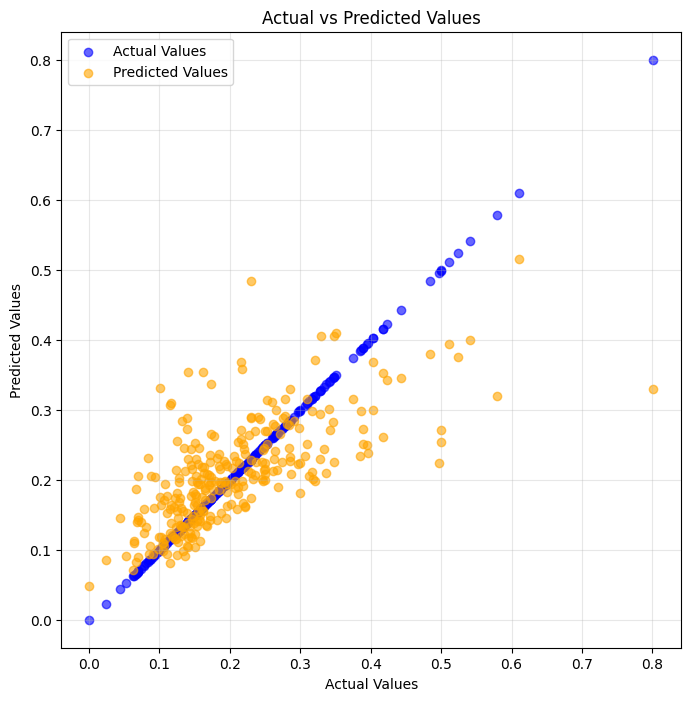

In [83]:

predictions = lr.predict(X_test)
#plt.scatter(y_test, predictions)
#sns.displot((y_test-predictions),bins=50,kde=True)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(Y_test, Y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(Y_test, predictions, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()